#### Importing Necessary Libraries

In [122]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression

#### Loading the Iris Dataset

In [123]:
iris=pd.read_csv(r"C:\Users\DELL\Downloads\Iris Flower - Iris.csv")

#### Making a copy of iris  dataset

In [124]:
irisc=iris.copy()

#### First 5 rows of the Iris Dataset

In [125]:
irisc.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Problem Statement
We are trying to use the sepal length,Sepal width, Petal length and Petal width to predict if an iris flower is of type Setosa,Versicolor or Virginica

#### Removing Id Column using slicing

In [126]:
irisc=irisc.iloc[:,1:]

In [127]:
irisc.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Descriptive analysis of iris dataset

In [128]:
irisc.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Information of iris dataset
checking the iris dataset if it is having null values or not and what are datatypes of the features

In [129]:
irisc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Changing the Species column values into 0,1 and 2

In [130]:
irisc["Species_values"]=iris["Species"].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [131]:
irisc["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [132]:
irisc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SepalLengthCm   150 non-null    float64
 1   SepalWidthCm    150 non-null    float64
 2   PetalLengthCm   150 non-null    float64
 3   PetalWidthCm    150 non-null    float64
 4   Species         150 non-null    object 
 5   Species_values  150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Data Analysis of iris dataset through visualization

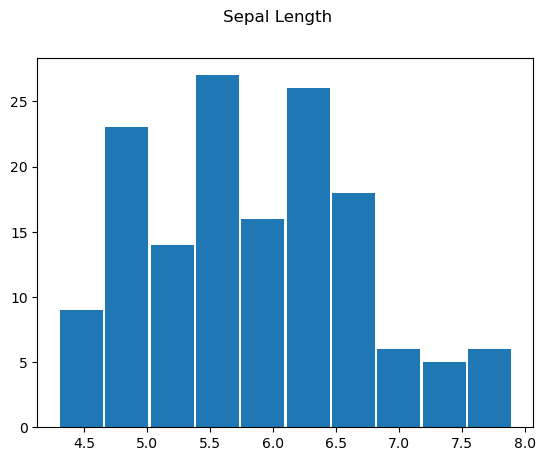

In [133]:
plt.hist(irisc["SepalLengthCm"],rwidth=0.95)
plt.suptitle("Sepal Length")
plt.show()

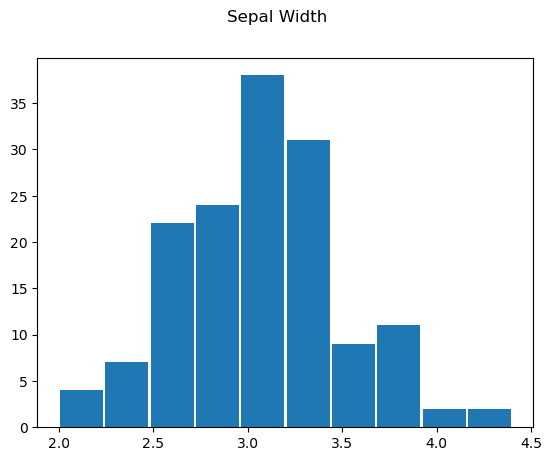

In [134]:
plt.hist(irisc["SepalWidthCm"],rwidth=0.95)
plt.suptitle("Sepal Width")
plt.show()

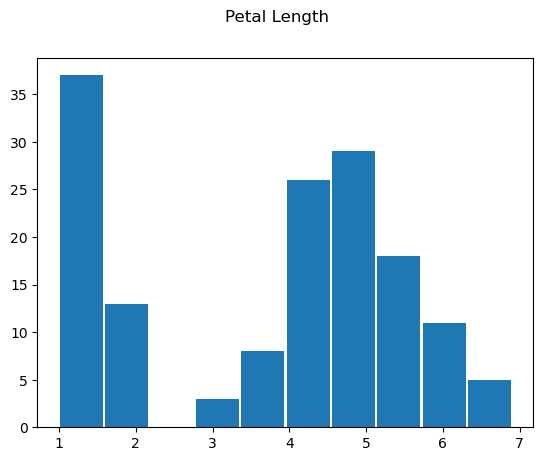

In [135]:
plt.hist(irisc["PetalLengthCm"],rwidth=0.95)
plt.suptitle("Petal Length")
plt.show()

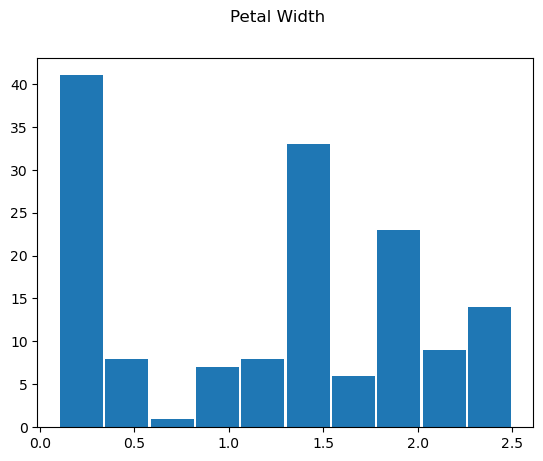

In [136]:
plt.hist(irisc["PetalWidthCm"],rwidth=0.95)
plt.suptitle("Petal Width")
plt.show()

#### Relationship of the features with the Class label(Species Column)

Checking if our data is balnced or not

In [137]:
irisc["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

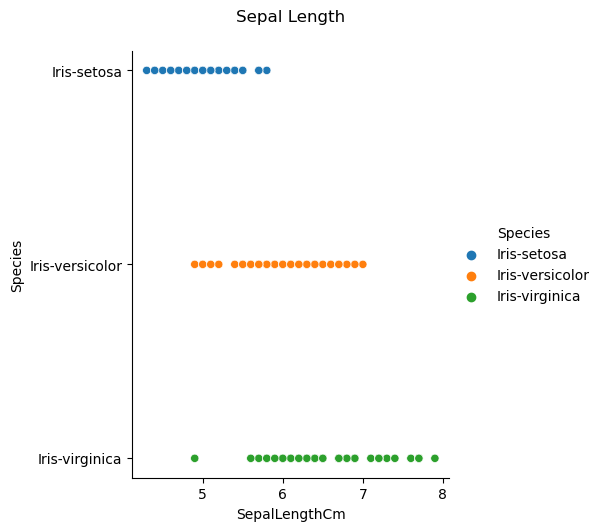

In [138]:
sns.relplot(x=irisc["SepalLengthCm"],y=irisc["Species"],hue=irisc["Species"],data=irisc)
_=plt.title("Sepal Length",y=1.05)   #I used y to put the title in middle of the plot
#we are using underscore to not get the ouput of the plot in words to get only plot

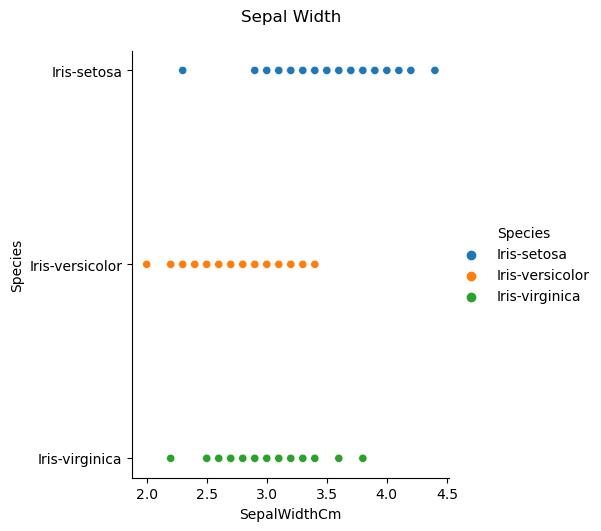

In [139]:
sns.relplot(x=irisc["SepalWidthCm"],y=irisc["Species"],hue="Species",data=irisc)
_=plt.title("Sepal Width",y=1.05)

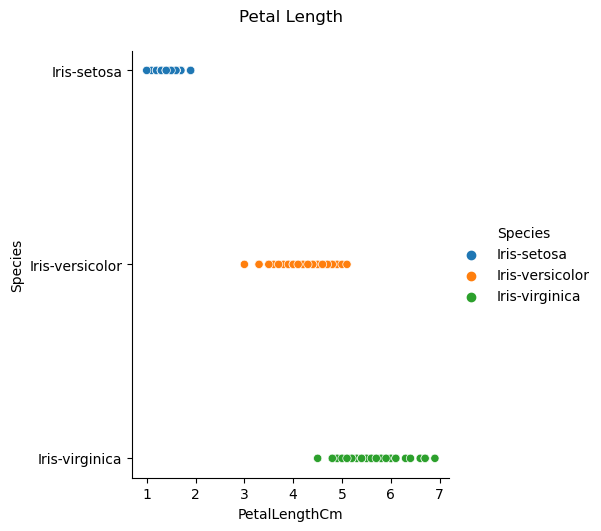

In [140]:
sns.relplot(x=irisc["PetalLengthCm"],y=irisc["Species"],hue="Species",data=irisc)
_=plt.title("Petal Length",y=1.05)

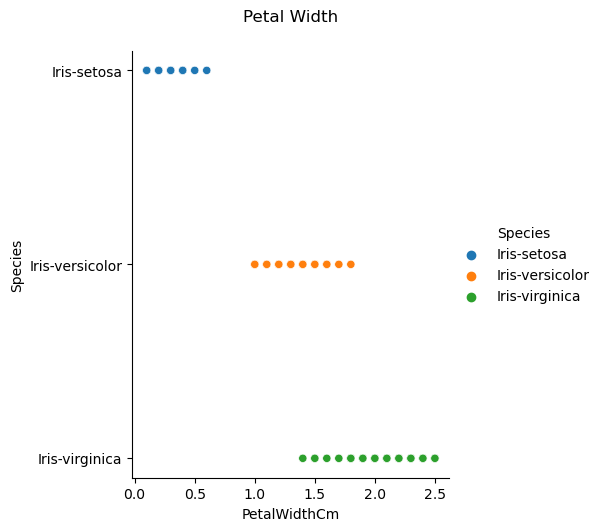

In [141]:
sns.relplot(x=irisc["PetalWidthCm"],y=irisc["Species"],hue="Species",data=irisc)
_=plt.title("Petal Width",y=1.05)

#### Exploratory Data Analysis

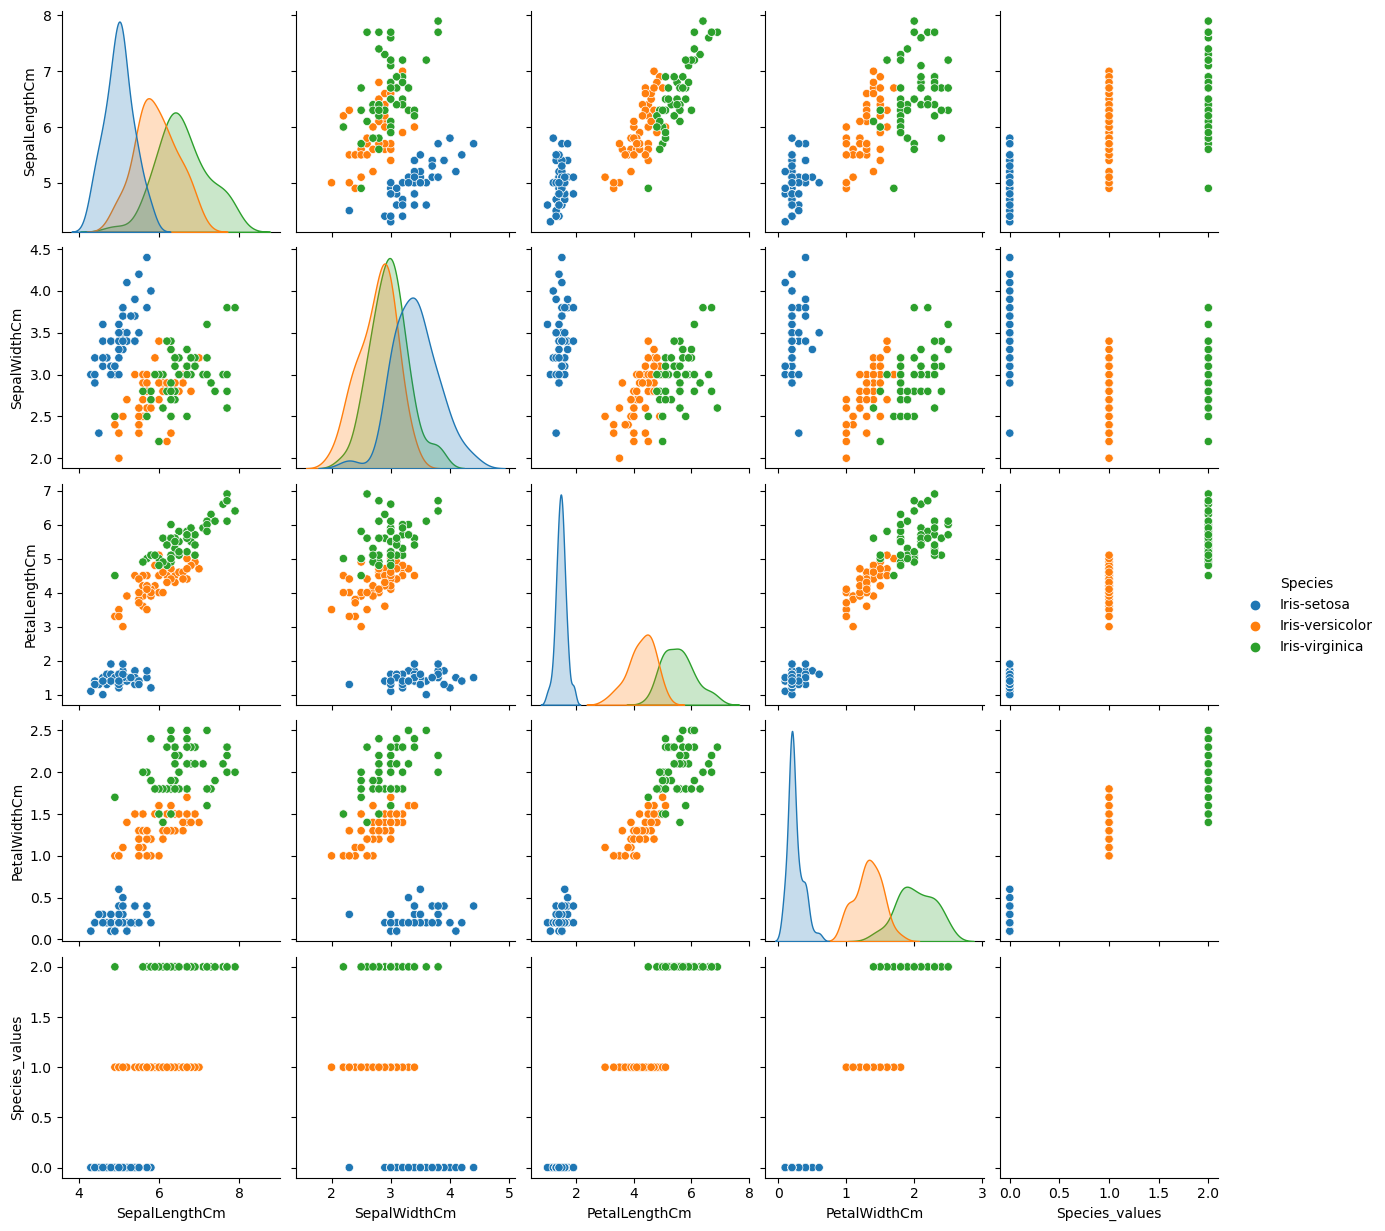

In [142]:
sns.pairplot(irisc,hue="Species")

#### Splitting our dataset into train and test data

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
train,test=train_test_split(irisc,test_size=0.2,stratify=irisc["Species"],random_state=2)

In [145]:
train.shape

(120, 6)

In [146]:
test.shape

(30, 6)

In [147]:
x_train=train.iloc[:,:-2]
y_train=train.iloc[:,-1]

In [148]:
x_train.shape

(120, 4)

In [149]:
y_train.shape

(120,)

In [150]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
63,6.1,2.9,4.7,1.4
123,6.3,2.7,4.9,1.8
100,6.3,3.3,6.0,2.5
149,5.9,3.0,5.1,1.8
9,4.9,3.1,1.5,0.1


In [151]:
y_train

63     1
123    2
100    2
149    2
9      0
      ..
93     1
75     1
47     0
48     0
101    2
Name: Species_values, Length: 120, dtype: int64

In [152]:
x_test=test.iloc[:,:-2]
y_test=test.iloc[:,-1]

In [153]:
x_test.shape

(30, 4)

In [154]:
y_test.shape

(30,)

In [155]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
45,4.8,3.0,1.4,0.3
120,6.9,3.2,5.7,2.3
126,6.2,2.8,4.8,1.8
8,4.4,2.9,1.4,0.2
58,6.6,2.9,4.6,1.3


In [156]:
y_test

45     0
120    2
126    2
8      0
58     1
122    2
136    2
113    2
18     0
22     0
99     1
82     1
59     1
137    2
7      0
117    2
95     1
49     0
115    2
11     0
76     1
72     1
43     0
67     1
91     1
139    2
130    2
40     0
69     1
15     0
Name: Species_values, dtype: int64

 ## Modelling

### Using cross validation to evaluate our model

In [157]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [158]:
model=LogisticRegression(max_iter=200,C=2)

In [159]:
model.fit(x_train,y_train)

LogisticRegression(C=2, max_iter=200)

In [160]:
accuracies=cross_val_score(model,x_train,y_train,cv=5,scoring="accuracy")

In [161]:
accuracies

array([1.        , 0.95833333, 1.        , 0.95833333, 0.875     ])

In [162]:
np.mean(accuracies)

0.9583333333333334

#### Where are we missclassifying points

In [163]:
y_pred=cross_val_predict(model,x_train,y_train,cv=5)

In [164]:
predicted_correctly_mask= y_pred==y_train

In [165]:
not_predicted_correctly= ~predicted_correctly_mask

In [166]:
x_train[not_predicted_correctly]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
83,6.0,2.7,5.1,1.6
70,5.9,3.2,4.8,1.8
138,6.0,3.0,4.8,1.8
106,4.9,2.5,4.5,1.7
77,6.7,3.0,5.0,1.7


In [167]:
df_predictions=train.copy()
df_predictions["correct_prediction"]=predicted_correctly_mask
df_predictions["prediction"]=y_pred
df_predictions["prediction_label"]=df_predictions["prediction"].map({0:"setosa",1:"versicolor",2:"virginica"})

In [168]:
df_predictions.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_values,correct_prediction,prediction,prediction_label
63,6.1,2.9,4.7,1.4,Iris-versicolor,1,True,1,versicolor
123,6.3,2.7,4.9,1.8,Iris-virginica,2,True,2,virginica
100,6.3,3.3,6.0,2.5,Iris-virginica,2,True,2,virginica
149,5.9,3.0,5.1,1.8,Iris-virginica,2,True,2,virginica
9,4.9,3.1,1.5,0.1,Iris-setosa,0,True,0,setosa


In [169]:
def plot_incorrect_predictions(data,x_axis_feature,y_axis_feature):
    fig,axs=plt.subplots(2,2,figsize=(10,10))
    axs=axs.flatten()
    sns.scatterplot(x=x_axis_feature,y=y_axis_feature,hue="prediction_label",data=data,ax=axs[0])
    sns.scatterplot(x=x_axis_feature,y=y_axis_feature,hue="Species",data=data,ax=axs[1])
    sns.scatterplot(x=x_axis_feature,y=y_axis_feature,hue="correct_prediction",data=data,ax=axs[2])
    axs[3].set_visible(False)
    
    plt.show()

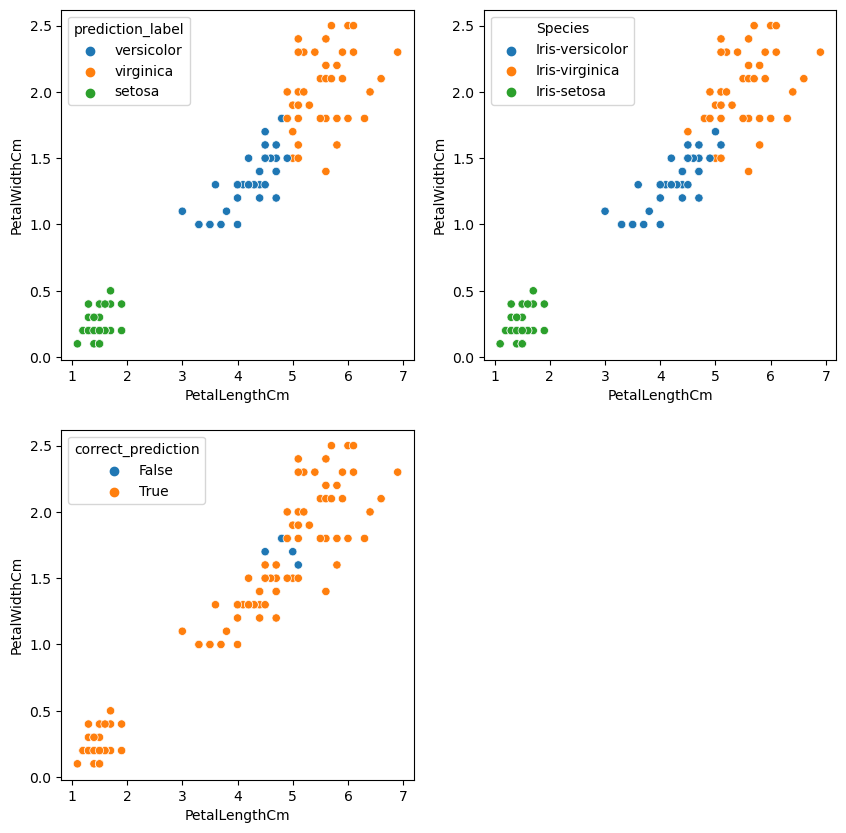

In [170]:
plot_incorrect_predictions(data=df_predictions,x_axis_feature="PetalLengthCm",y_axis_feature="PetalWidthCm")

In [171]:
y_test_pred=model.predict(x_test)

In [172]:
y_test_pred

array([0, 2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1,
       0, 1, 1, 2, 2, 0, 1, 0], dtype=int64)

In [173]:
predicted_correctly_mask_test= y_test_pred==y_test
test_set_accuracy=np.mean(predicted_correctly_mask_test)

In [174]:
test_set_accuracy

1.0

In [175]:
y_test_pred=model.predict(x_test)
predicted_correctly_mask_test= y_test_pred==y_test
not_predicted_correctly= ~predicted_correctly_mask_test
x_test[not_predicted_correctly]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm


In [176]:
df_predictions_test=test.copy()
df_predictions_test["correct_prediction"]=predicted_correctly_mask_test
df_predictions_test["prediction"]=y_test_pred
df_predictions_test["prediction_label"]=df_predictions_test["prediction"].map({0:"setosa",1:"versicolor",2:"virginica"})

In [177]:
df_predictions_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_values,correct_prediction,prediction,prediction_label
45,4.8,3.0,1.4,0.3,Iris-setosa,0,True,0,setosa
120,6.9,3.2,5.7,2.3,Iris-virginica,2,True,2,virginica
126,6.2,2.8,4.8,1.8,Iris-virginica,2,True,2,virginica
8,4.4,2.9,1.4,0.2,Iris-setosa,0,True,0,setosa
58,6.6,2.9,4.6,1.3,Iris-versicolor,1,True,1,versicolor


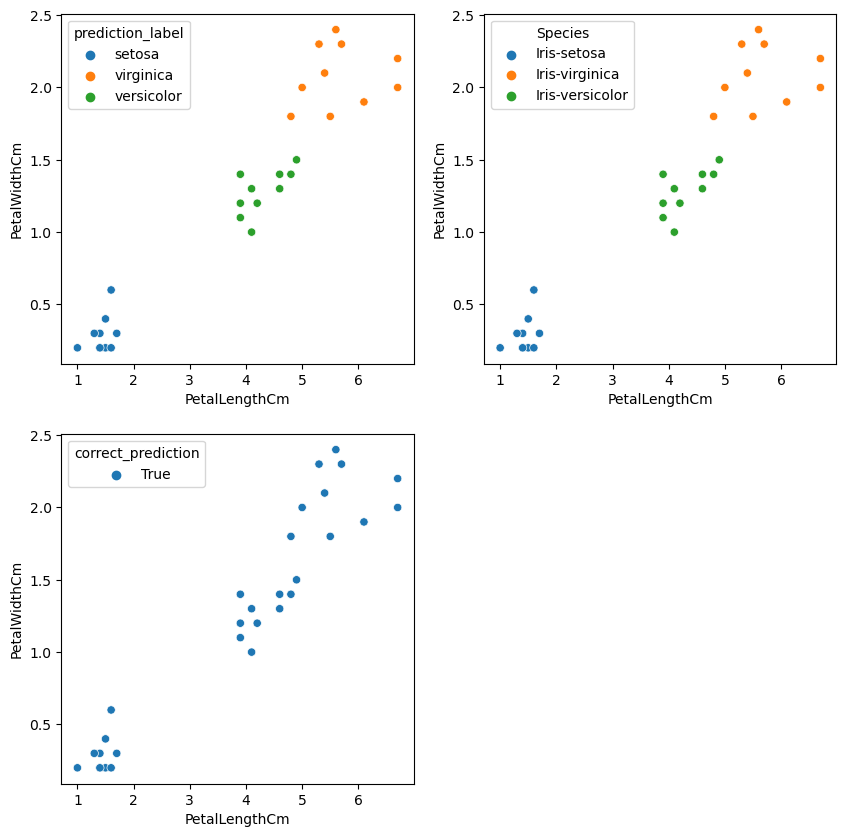

In [178]:
plot_incorrect_predictions(data=df_predictions_test,x_axis_feature="PetalLengthCm",y_axis_feature="PetalWidthCm")

### Conclusion
I have made a classification model using logistic regression by tuning it with max_iterations as 200 and c means regularization as 2 